# Udacity: Machine Learning Final Project 
#### by Rachel Foong

### Project Goal
The goal of this project is to identify Enron Employees who may have committed fraud based on the public Enron financial and email dataset.

### Dataset Exploration
Machine learning is useful to comb and refine the dataset that consists of **146 data points** with **21 features** with **18 Persons of Interest (POI)**. 

This is especially true when there are a large number of missing values represented as "NaNs" in each feature. To analyse the data, I've replaced NaNs with 0.

#### Observations
-  The loan advances, deferral_payments, director_fees and restricted_stock_deferred columns have the highest number of missing values
- Out of the set, total_payments and total_stock_value have the lowest amount of missing values

Through this simple table, it's easy to hypothesise that the POIs are essentially skewing the Max values. When we isolate the 18 POIs, we see a different story. 

POIs generally average higher in all values. It's strange to see that the Max values don't match the Max values earlier observed; which subsequently means that the outliers in the data are not all coming from POIs. 

### Outliers

When we dig deeper into the Max. values, we find that the email address which has the Max Value for total_payments is actually the "TOTAL" value for all columns. When we remove the outlier, the Max values now match the POI values and the total means are lower. 

While removing "TOTAL" helped in reconciling the differences between the POI and both POI and non-POI values, when we plot the two features for totals together, we find that there are still a couple of Outliers, especially one POI; namely **"LAY KENNETH L"**. (the top right orange dot in the scatter plot)

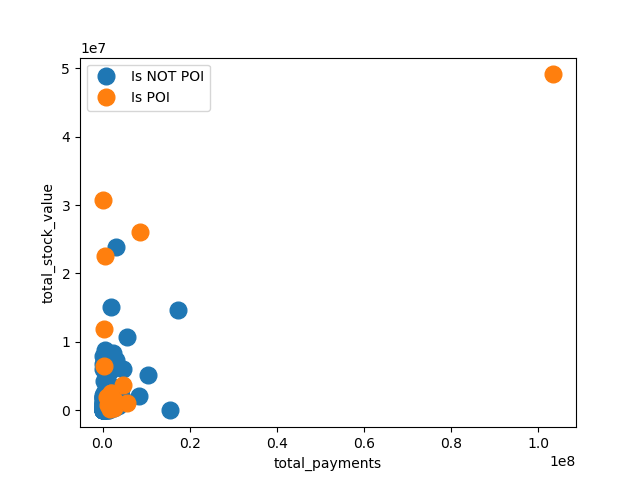

In [1]:
from IPython.display import Image
Image("Outlier1.png")

By removing "LAY KENNETH L" and by removing a non-POI "THE TRAVEL AGENCY IN THE PARK" who is listed in the PDF, we get really different results. 

While there seems to be a positive correlation between the two features, we can clearly see it is weak even without calculating the correlation coeff. 

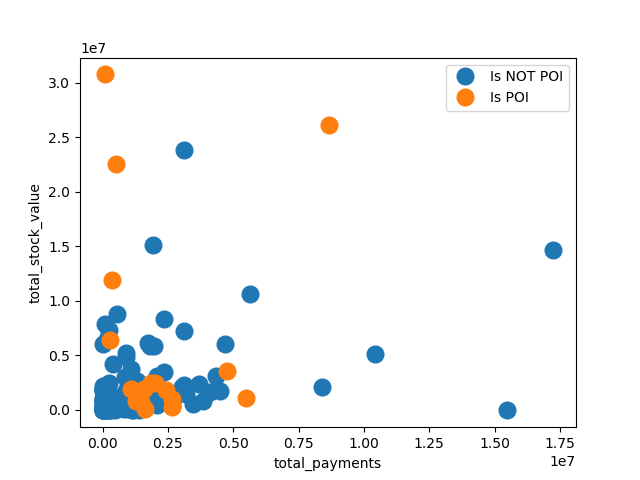

In [2]:
Image("Outlier2.png")

POI numbers without Kenneth Lay are also lower and some Max. values are starting to match the non-POI numbers. 

Now that we have cleaned up our data and it makes a lot more sense, we can finally move on to creating a model to detect POIs. 

### Feature Engineering 

#### New Feature: % of Stock Value over Payments
At this point, while total_payments and total_stock_value have a low level of missing values and therefore one would assume a better fit for the data, it's all because these features happen to be totals of all the other features. 

However this pair makes for a good feature. When comparing averages of total stock value over payments, POI seem to have a higher total stock value per total payment ratio. We can use feature selection tools to evaluate this hypothesis. I've named the new feature "stock_value_ratio". I will test this once we've determined the best feature algorithm and parameters for the original dataset. 

#### Feature Selection
In order to better evaluate prediction of the POI by their monetary activity and attributes, I have removed all features that look at the email activity from and between poi and sender (email_address, from_messages, from_poi_to_this_person, from_this_person_to_poi, shared_receipt_with_poi). This is to also ensure the variance in the data makes sense before applying feature reduction techniques. 

After removing these features, the final feature list (without the new, untested feature) is:
- 'total_payments'
- 'total_stock_value'
- 'salary'
- 'deferral_payments'
- 'exercised_stock_options'
- 'bonus'
- 'restricted_stock'
- 'restricted_stock_deferred'
- 'expenses'
- 'loan_advances'
- 'other'
- 'director_fees'
- 'deferred_income'
- 'long_term_incentive'


#### Feature Scaling
In order to use GridSearchCV, non-negative values need to be excluded. So I've used MinMaxScaler() to scale the features and standardize the features for validation.


### Cross-Validation: Feature Reduction and Classifier Algorithm on Original Dataset

Next, in order to appropriate the best method for identifying POIs, we need to validate all methods. This is necessary because we need to discover the best model fit that can be applied for other samples.

To validate the best combination of feature selection, classifiers and its parameters, I've used GridSearchCV with the StratifiedShuffleSplit module (to be in line with test CV module) that passes the combination into the tester file's testing module. 

In order to achieve the possibility of a higher score, it's best to tune the parameters of the algorithm. If I don't do this well, I'll miss out on that opportunity and could possibly overfit the data. 

To sync with the tester.py random state, I have left the random state at 42 wherever possible in the algorithms. 

The comparisons between each part of the combo is as such
- **Feature Selection**: Comparing between SelectKBest, SelectPercentile and PCA
- **Classifier Algorithn**: Comparing between LinearSVC, SVC, GaussianNB, KNeighborsClassifier and DecisionTreeClassifier

After validating, the combo that **GridSearchCV** determined was best was 
- **Feature Selection**: SelectKBest 
- **Classifier Algorithn**: GaussianNB 
with an Accuracy score of 0.7, Precision score of 0.2 and Recall of 0.6.

A higher precision score would mean that when a POI gets flagged in my test set, I know with confidence that it's a real POI and not a false alarm. However I would probably miss the real POIs since I'm effectively reluctant to pull the trigger on edge cases.

A higher recall score would mean that whenever a POI shows up in the test set, I am able to identify him/her. The cost of this is that sometimes I get some false positives where non-POIs get flagged.

### Further Tuning and Validation Needed

#### Evaluating Feature Scaling
Because Precision is below 0.3, we'll need to see if other methods work as well. Using MinMaxScaler() to scale the features as it's perfect for handling negative values, I ran the validation code again.

This time Accuracy and Precision scores were slightly lower. Not ideal for this project. 


#### Evaluating the new feature
I then tested out the new feature (stock_value_ratio) to see if it helps in gaining a higher score with any of the combos. 

Unfortunately, both Precision and Recall scores were lower. Because this isn't ideal we will need to go ahead without the new feature and try to tune the parameters to achieve a higher score. 

#### Parameter Tuning 
Because SelectKBest and GaussianNB came out as the best performing feature reduction model and classifier respectively, I then proceeded with trying to fine tune the parameters for SelectKBest by tuning the k parameter.

As it turns out, k=9 produced an **Accuracy score of 0.8, Precision of 0.3, Recall of 0.5**. Definitely an improvement to where we were before. Perfect!

The final combo is as below:
- SelectKBest(k=9, score_func=f_classif), 
- GaussianNB(priors=None)

produced ...
- Accuracy: 0.76880
- Precision: 0.29195
- Recall: 0.51500 
- F1: 0.37265
- F2: 0.44674
- Total predictions: 15000        
- True positives: 1030    
- False positives: 2498   
- False negatives:  970   
- True negatives: 10502

